# Quick Data Inspection

Simple notebook to take a quick look at the downloaded Deribit BTC data.

In [5]:
import pandas as pd
from pathlib import Path
from datetime import datetime
import matplotlib.pyplot as plt

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

In [6]:
# Define data paths
options_path = Path('../raw/options/feather/deribit/BTC')
spot_path = Path('../raw/spot/feather/binance/BTCUSDT')

print("=== DATA OVERVIEW ===")

print("\n--- OPTIONS ---")

if not options_path.exists():
    print("No options data found")
else:
    files = sorted(list(options_path.glob('*.feather')))
    if not files:
        print("No options files found")
    else:
        print(f"Files: {len(files)} ({files[0].stem} to {files[-1].stem})")
        
        # Load a sample file from the middle
        sample_file = files[len(files)//2]
        df = pd.read_feather(sample_file)
        
        print(f"Sample file: {sample_file.name}")
        print(f"   Rows: {len(df):,}")
        print(f"   Columns: {list(df.columns)}")
        
        if 'timestamp' in df.columns:
            df['datetime'] = pd.to_datetime(df['timestamp'], unit='us', utc=True)
            print(f"   Time range: {df['datetime'].min()} to {df['datetime'].max()}")
        
        if 'price' in df.columns:
            print(f"   Price range: {df['price'].min():.4f} - {df['price'].max():.4f}")
        
        if 'instrument' in df.columns:
            print(f"   Instruments: {df['instrument'].nunique()} unique")
            print(f"   Top 3: {df['instrument'].value_counts().head(3).index.tolist()}")

print("\n--- SPOT (KLINES) ---")

if not spot_path.exists():
    print("No spot data found")
else:
    files = sorted(list(spot_path.glob('*.feather')))
    if not files:
        print("No spot files found")
    else:
        print(f"Files: {len(files)} ({files[0].stem} to {files[-1].stem})")
        
        # Load a sample file from the middle
        sample_file = files[len(files)//2]
        df = pd.read_feather(sample_file)
        
        print(f"Sample file: {sample_file.name}")
        print(f"   Rows: {len(df):,}")
        print(f"   Columns: {list(df.columns)}")
        
        if 'timestamp' in df.columns:
            df['datetime'] = pd.to_datetime(df['timestamp'], unit='us', utc=True)
            print(f"   Time range: {df['datetime'].min()} to {df['datetime'].max()}")
        
        if 'close' in df.columns:
            print(f"   Price range: {df['close'].min():.2f} - {df['close'].max():.2f}")
        
        if 'volume' in df.columns:
            print(f"   Volume range: {df['volume'].min():.4f} - {df['volume'].max():.4f} BTC")
            print(f"   Total volume: {df['volume'].sum():.2f} BTC")

=== DATA OVERVIEW ===

--- OPTIONS ---
Files: 182 (2024-01-01 to 2024-06-30)
Sample file: 2024-04-01.feather
   Rows: 14,045
   Columns: ['timestamp', 'id', 'price', 'quantity', 'is_buyer_maker', 'instrument', 'iv', 'mark_price', 'index_price']
   Time range: 2024-04-01 00:00:01.108000+00:00 to 2024-04-01 23:59:58.524000+00:00
   Price range: 0.0001 - 2.1000
   Instruments: 571 unique
   Top 3: ['BTC-2APR24-70500-C', 'BTC-2APR24-71000-C', 'BTC-2APR24-73000-C']

--- SPOT (KLINES) ---
Files: 181 (2024-01-02 to 2024-06-30)
Sample file: 2024-04-01.feather
   Rows: 1,893,438
   Columns: ['timestamp', 'id', 'price', 'quantity', 'is_buyer_maker']
   Time range: 2024-04-01 00:00:00+00:00 to 2024-04-01 23:59:59.998000+00:00


In [7]:
# Load and display sample data
print("=== SAMPLE DATA ===")

# OPTIONS DATA
if options_path.exists():
    files = sorted(list(options_path.glob('*.feather')))
    if files:
        print("\n--- OPTIONS SAMPLE ---")
        
        # Load middle file
        sample_file = files[len(files)//2]
        df = pd.read_feather(sample_file)
        df['datetime'] = pd.to_datetime(df['timestamp'], unit='us', utc=True)
        
        print(f"\nFirst 10 rows from {sample_file.name}:")
        display(df.head(10))
        
        print(f"\nBasic statistics:")
        numeric_cols = ['price', 'quantity', 'iv', 'mark_price', 'index_price']
        available_cols = [col for col in numeric_cols if col in df.columns]
        if available_cols:
            display(df[available_cols].describe())

# SPOT DATA  
if spot_path.exists():
    files = sorted(list(spot_path.glob('*.feather')))
    if files:
        print("\n--- SPOT SAMPLE ---")
        
        # Load middle file
        sample_file = files[len(files)//2]
        df = pd.read_feather(sample_file)
        df['datetime'] = pd.to_datetime(df['timestamp'], unit='us', utc=True)
        
        print(f"\nFirst 10 rows from {sample_file.name}:")
        display(df.head(10))
        
        print(f"\nBasic statistics:")
        numeric_cols = ['open', 'high', 'low', 'close', 'volume', 'quote_volume', 'trades_count']
        available_cols = [col for col in numeric_cols if col in df.columns]
        if available_cols:
            display(df[available_cols].describe())

=== SAMPLE DATA ===

--- OPTIONS SAMPLE ---

First 10 rows from 2024-04-01.feather:


timestamp         id   price  quantity  is_buyer_maker  \
0  1711929601108000  294810352  0.0060       1.0            True   
1  1711929601412000  294810359  0.0620       1.1            True   
2  1711929602313000  294810377  0.0080       0.2           False   
3  1711929602389000  294810380  0.0075       0.3           False   
4  1711929602486000  294810382  0.0325       0.1            True   
5  1711929602861000  294810389  0.0200       0.6           False   
6  1711929603285000  294810417  0.0155       1.2           False   
7  1711929603478000  294810419  0.0028       1.0           False   
8  1711929603877000  294810427  0.0060       0.8           False   
9  1711929605091000  294810434  0.0200       1.2           False   

            instrument     iv  mark_price  index_price  \
0   BTC-1APR24-71500-P  39.23    0.006585     71301.17   
1  BTC-19APR24-73000-C  72.05    0.061816     71301.17   
2   BTC-1APR24-71000-C  44.46    0.007532     71303.69   
3   BTC-2APR24-73000-C  66.19    0.007670     71303.69   
4  BTC-31MAY24-58000-P  77.09    0.032853     71303.69   
5   BTC-3APR24-71500-P  63.64    0.020271     71303.69   
6   BTC-3APR24-72500-C  67.02    0.015769     71291.17   
7   BTC-1APR24-71000-P  39.84    0.002840     71291.17   
8   BTC-1APR24-71500-P  39.46    0.006538     71291.17   
9   BTC-3APR24-71500-P  63.19    0.020438     71278.41   

                          datetime  
0 2024-04-01 00:00:01.108000+00:00  
1 2024-04-01 00:00:01.412000+00:00  
2 2024-04-01 00:00:02.313000+00:00  
3 2024-04-01 00:00:02.389000+00:00  
4 2024-04-01 00:00:02.486000+00:00  
5 2024-04-01 00:00:02.861000+00:00  
6 2024-04-01 00:00:03.285000+00:00  
7 2024-04-01 00:00:03.478000+00:00  
8 2024-04-01 00:00:03.877000+00:00  
9 2024-04-01 00:00:05.091000+00:00


Basic statistics:


price      quantity            iv    mark_price   index_price
count  14045.000000  14045.000000  14045.000000  14045.000000  14045.000000
mean       0.026810      0.942456     70.330877      0.026879  69521.949875
std        0.052283      5.343509     11.655029      0.052318    726.859425
min        0.000100      0.100000      0.000000      0.000000  68083.140000
25%        0.003600      0.100000     64.510000      0.003744  69045.600000
50%        0.011500      0.200000     70.340000      0.011437  69539.040000
75%        0.033000      0.500000     76.670000      0.032901  69784.390000
max        2.100000    200.000000    244.220000      2.097918  71303.690000


--- SPOT SAMPLE ---

First 10 rows from 2024-04-01.feather:


timestamp          id     price  quantity  is_buyer_maker  \
0  1711929600000000  3523985836  71280.00   0.00141            True   
1  1711929600001000  3523985837  71280.00   0.00075            True   
2  1711929600003000  3523985838  71280.00   0.00045            True   
3  1711929600005000  3523985839  71280.00   0.00078            True   
4  1711929600006000  3523985840  71280.01   0.00132           False   
5  1711929600010000  3523985841  71280.00   0.00044            True   
6  1711929600011000  3523985842  71280.00   0.00117            True   
7  1711929600011000  3523985843  71280.00   0.00020            True   
8  1711929600011000  3523985844  71280.01   0.00028           False   
9  1711929600011000  3523985845  71280.01   0.00066           False   

                          datetime  
0        2024-04-01 00:00:00+00:00  
1 2024-04-01 00:00:00.001000+00:00  
2 2024-04-01 00:00:00.003000+00:00  
3 2024-04-01 00:00:00.005000+00:00  
4 2024-04-01 00:00:00.006000+00:00  
5 2024-04-01 00:00:00.010000+00:00  
6 2024-04-01 00:00:00.011000+00:00  
7 2024-04-01 00:00:00.011000+00:00  
8 2024-04-01 00:00:00.011000+00:00  
9 2024-04-01 00:00:00.011000+00:00


Basic statistics:


=== VISUALIZATIONS ===

--- OPTIONS DATA VISUALIZATION ---


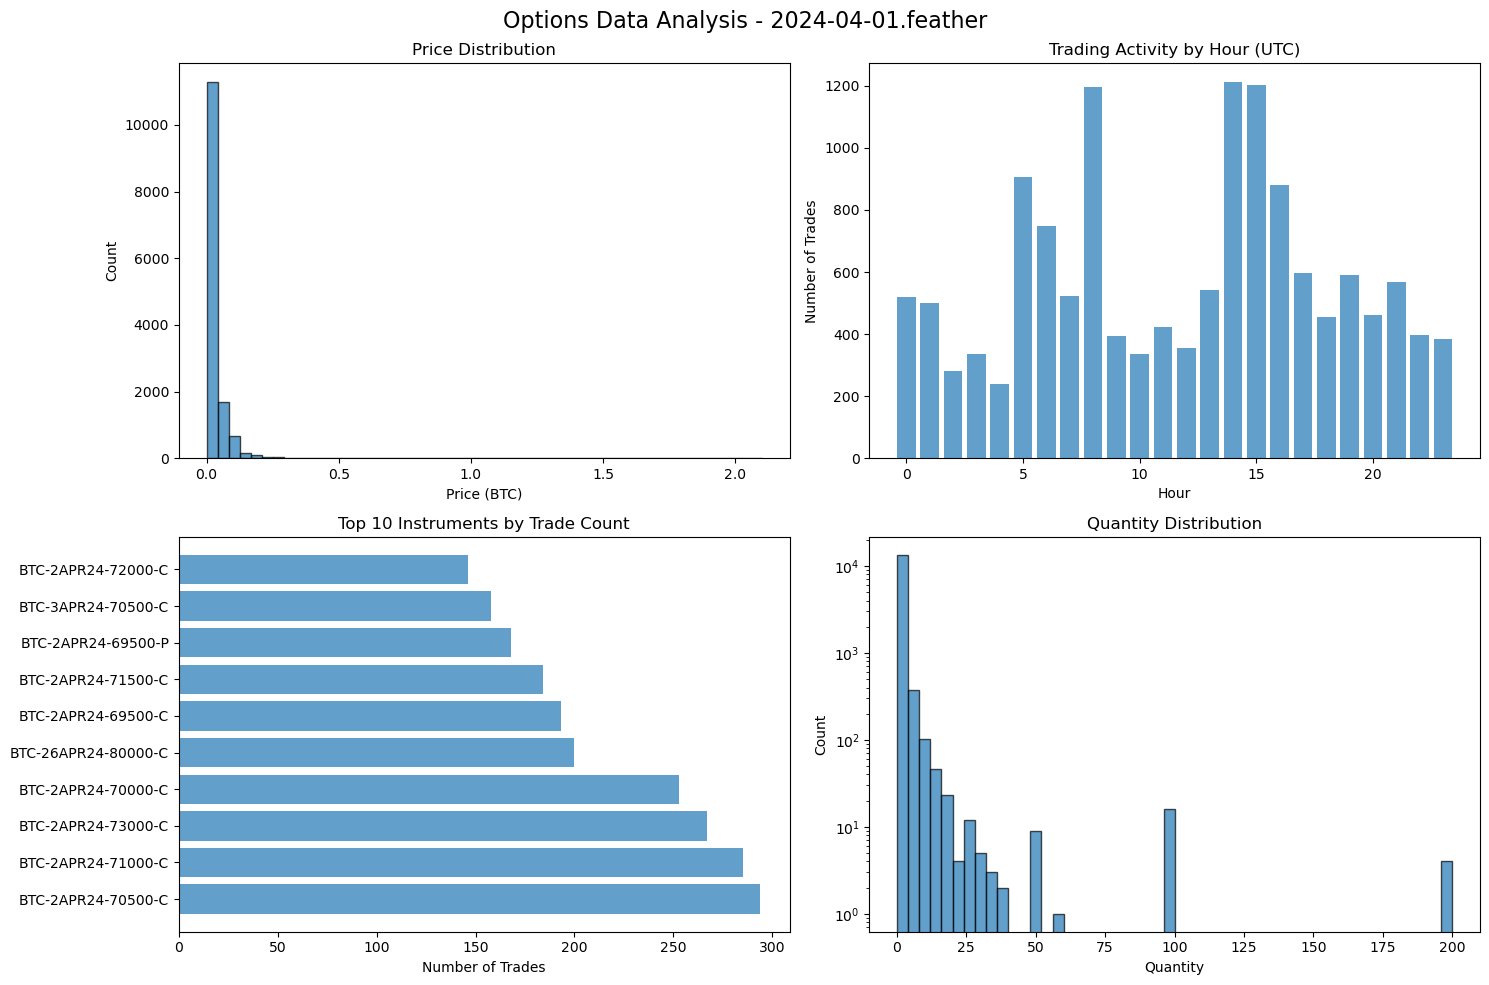

Sample from 2024-04-01.feather (14,045 trades)

--- SPOT DATA VISUALIZATION ---


KeyError: 'close'

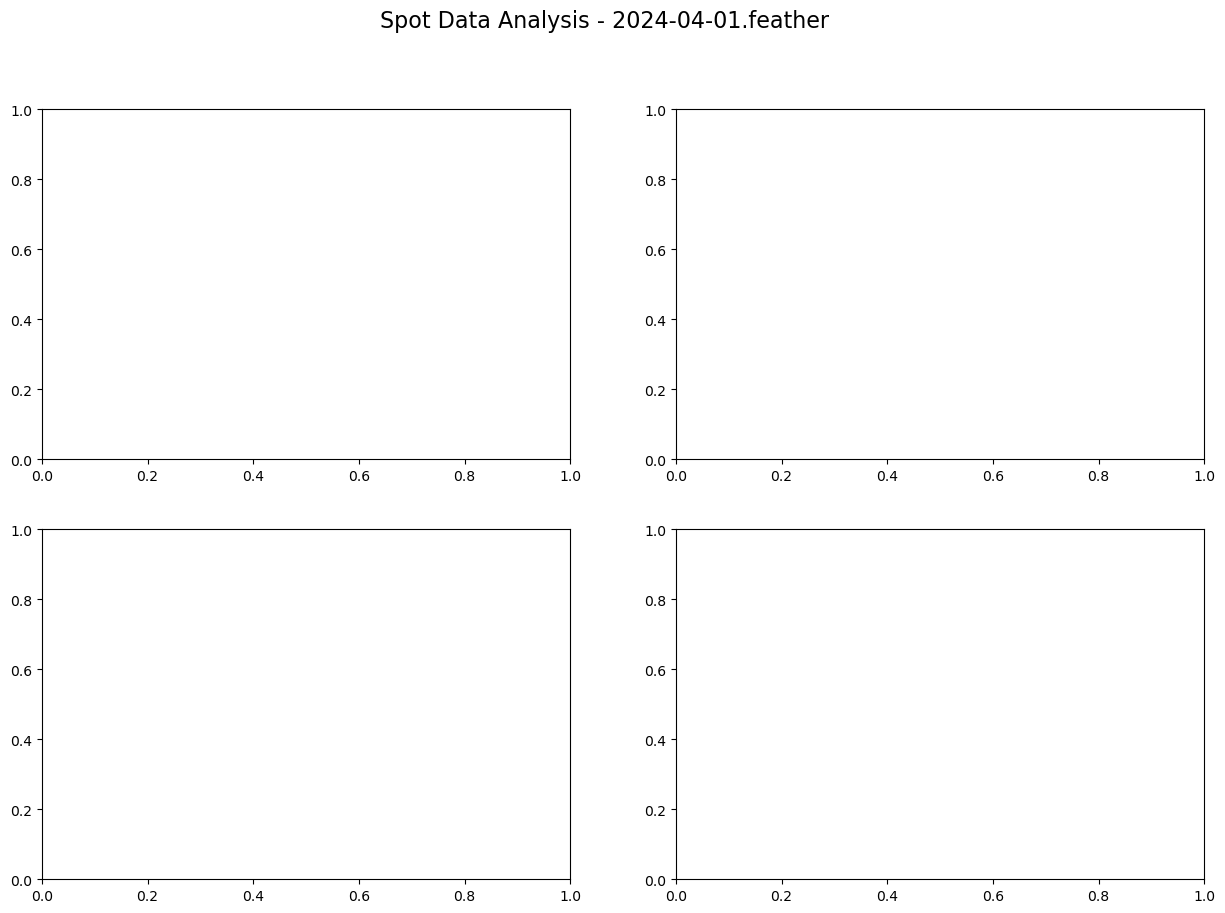

In [8]:
# Simple visualization (if data exists)
print("=== VISUALIZATIONS ===")

# OPTIONS VISUALIZATION
if options_path.exists():
    files = sorted(list(options_path.glob('*.feather')))
    if files and len(files) > 0:
        print("\n--- OPTIONS DATA VISUALIZATION ---")
        
        # Load sample file
        sample_file = files[len(files)//2]
        df = pd.read_feather(sample_file)
        df['datetime'] = pd.to_datetime(df['timestamp'], unit='us', utc=True)
        
        # Create simple plots for options
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle(f'Options Data Analysis - {sample_file.name}', fontsize=16)
        
        # Price distribution
        ax1.hist(df['price'], bins=50, alpha=0.7, edgecolor='black')
        ax1.set_title('Price Distribution')
        ax1.set_xlabel('Price (BTC)')
        ax1.set_ylabel('Count')
        
        # Trading activity over time
        df['hour'] = df['datetime'].dt.hour
        hourly_counts = df['hour'].value_counts().sort_index()
        ax2.bar(hourly_counts.index, hourly_counts.values, alpha=0.7)
        ax2.set_title('Trading Activity by Hour (UTC)')
        ax2.set_xlabel('Hour')
        ax2.set_ylabel('Number of Trades')
        
        # Top instruments
        top_instruments = df['instrument'].value_counts().head(10)
        ax3.barh(range(len(top_instruments)), top_instruments.values, alpha=0.7)
        ax3.set_yticks(range(len(top_instruments)))
        ax3.set_yticklabels(top_instruments.index)
        ax3.set_title('Top 10 Instruments by Trade Count')
        ax3.set_xlabel('Number of Trades')
        
        # Quantity distribution
        ax4.hist(df['quantity'], bins=50, alpha=0.7, edgecolor='black')
        ax4.set_title('Quantity Distribution')
        ax4.set_xlabel('Quantity')
        ax4.set_ylabel('Count')
        ax4.set_yscale('log')  # Log scale for better visibility
        
        plt.tight_layout()
        plt.show()
        
        print(f"Sample from {sample_file.name} ({len(df):,} trades)")

# SPOT VISUALIZATION
if spot_path.exists():
    files = sorted(list(spot_path.glob('*.feather')))
    if files and len(files) > 0:
        print("\n--- SPOT DATA VISUALIZATION ---")
        
        # Load sample file
        sample_file = files[len(files)//2]
        df = pd.read_feather(sample_file)
        df['datetime'] = pd.to_datetime(df['timestamp'], unit='us', utc=True)
        
        # Create plots for spot data
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle(f'Spot Data Analysis - {sample_file.name}', fontsize=16)
        
        # OHLC Chart (simplified - just close prices over time)
        ax1.plot(df['datetime'], df['close'], linewidth=1, alpha=0.8)
        ax1.set_title('BTC Price Over Time (Close)')
        ax1.set_xlabel('Time')
        ax1.set_ylabel('Price (BTC)')
        ax1.tick_params(axis='x', rotation=45)
        
        # Volume over time
        ax2.bar(df['datetime'], df['volume'], alpha=0.7, width=0.02)
        ax2.set_title('Trading Volume Over Time')
        ax2.set_xlabel('Time')
        ax2.set_ylabel('Volume (BTC)')
        ax2.tick_params(axis='x', rotation=45)
        
        # Price distribution (close prices)
        ax3.hist(df['close'], bins=30, alpha=0.7, edgecolor='black')
        ax3.set_title('Close Price Distribution')
        ax3.set_xlabel('Price (BTC)')
        ax3.set_ylabel('Count')
        
        # Volume distribution
        ax4.hist(df['volume'], bins=30, alpha=0.7, edgecolor='black')
        ax4.set_title('Volume Distribution')
        ax4.set_xlabel('Volume (BTC)')
        ax4.set_ylabel('Count')
        
        plt.tight_layout()
        plt.show()
        
        print(f"Sample from {sample_file.name} ({len(df):,} klines)")
        
        # Additional spot data insights
        print(f"\nSpot Data Insights:")
        print(f"   Price range: {df['low'].min():.2f} - {df['high'].max():.2f}")
        print(f"   Average volume: {df['volume'].mean():.2f} BTC")
        print(f"   Total trades: {df['trades_count'].sum():,}")
        
        # Calculate basic returns
        df['returns'] = df['close'].pct_change()
        print(f"   Volatility (std of returns): {df['returns'].std():.4f}")
        print(f"   Max intraday range: {((df['high'] - df['low']) / df['open']).max():.2%}")